In [483]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [571]:
df = pd.read_csv('../data/data.tsv', sep = '\t')

In [572]:
# sns.distplot(df['AVGDV'])

## Data Preprocessing

In [573]:
# drop irrelevant features or those that are directly correlated with AVGDV, and categorical variables
df.drop(['OBJECTID', 'TRACT', 'STATE_FIPS','BLKGRP', 'DV05', 'DV06', 'DVWEEKEND', 'DVWEEKNIGHT', 'DVENDNIGHT', 'METRODUMMY', 'PUBHOUSINGDUMMY'], axis = 1, inplace = True)

In [574]:
# Drop due to multicollinearity
df.drop(['AVGADW0506','MPDDIS06','UIWEEKNIGH','UIWEEKEND','UIWEEKNIGH','UIENDNIGHT','MPDWEEKNIG', 'ADW06','AVGUIDISOR','AGE_UNDER5','MPDWENDNIG', 'MPDWEEKEND','UIDIS05', 'UIDIS06', 'MPDDIS05','SHAPE_LENG','SHAPE_AREA', 'POP2000', 'POP00_SQMI', 'ADW05', 'ADW00', 'ADW01', 'BUSSTOP_SQMI'], axis = 1, inplace = True)

In [532]:
#Taking a look at the correlation matrix, we removed variables with high collinearity
df.corr()

,VACANTPERCENT,POP2004,POP04_SQMI,WHITE,BLACK,ASIAN,HISPANIC,AGE_5_17,AGE_18_21,AGE_22_29,...,STORE_SQMI,REST_SQMI,STLIGHT_SQMI,PROSO_SQMI,HOMLESS_SQMI,NO_SINGLES,NOTALLOWS_SQMI,ALLOWS_SQMI,PCTNOTALLOW,ARR_0506
VACANTPERCENT,1.000000,-0.084832,-0.268042,-0.272719,0.185176,-0.198299,-0.152902,0.142108,0.035872,-0.168820,...,-0.157702,-0.143778,-0.303551,-0.012227,-0.068978,-0.085813,-0.069021,-0.145297,-0.062168,0.203550
POP2004,-0.084832,1.000000,0.452502,0.492743,0.512490,0.523551,0.567192,0.601602,0.414743,0.773351,...,0.063353,0.090122,-0.168167,-0.031394,0.190006,0.183050,0.098326,0.026434,0.145490,0.197255
POP04_SQMI,-0.268042,0.452502,1.000000,0.222921,0.125400,0.383532,0.590400,0.185684,0.121117,0.568347,...,0.465033,0.280268,0.451913,0.323687,0.415986,0.248229,0.323481,0.374193,0.131344,0.028829
WHITE,-0.272719,0.492743,0.222921,1.000000,-0.451859,0.735783,0.265529,-0.236591,0.405911,0.615000,...,0.033578,0.281278,-0.071418,-0.154532,0.058699,0.188659,0.102525,-0.008794,0.131923,-0.172010
BLACK,0.185176,0.512490,0.125400,-0.451859,1.000000,-0.255201,0.118369,0.854494,0.047968,0.138948,...,-0.049488,-0.220648,-0.159564,0.038584,0.037152,-0.044343,-0.061722,-0.027472,-0.007766,0.322027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NO_SINGLES,-0.085813,0.183050,0.248229,0.188659,-0.044343,0.261929,0.266225,0.010428,0.026656,0.227244,...,0.365987,0.223074,0.048170,0.124682,0.124346,1.000000,0.866361,0.017750,0.805807,-0.000372
NOTALLOWS_SQMI,-0.069021,0.098326,0.323481,0.102525,-0.061722,0.218938,0.278549,-0.007460,0.008715,0.169451,...,0.451789,0.263760,0.076019,0.187599,0.148618,0.866361,1.000000,0.053337,0.536505,-0.007949
ALLOWS_SQMI,-0.145297,0.026434,0.374193,-0.008794,-0.027472,0.059682,0.216087,-0.031930,-0.052731,0.150160,...,0.914952,0.298395,0.318084,0.382324,0.321185,0.017750,0.053337,1.000000,-0.061916,0.153451
PCTNOTALLOW,-0.062168,0.145490,0.131344,0.131923,-0.007766,0.160247,0.186153,0.028293,0.019293,0.155441,...,0.161506,0.095578,0.031967,0.042816,0.050834,0.805807,0.536505,-0.061916,1.000000,-0.016486


In [581]:
X = df.drop('AVGDV', axis = 1)
y = df['AVGDV']
X.shape

(431, 69)

### Lasso Regression

In [582]:
scaler = StandardScaler()
scaler = scaler.fit(X)
then = scaler.transform(X)
scaled_df = pd.DataFrame(then, columns = X.columns)
scaled_df.shape

(431, 69)

In [583]:
clf = Lasso()

In [590]:
# With Lasso, the higher the alpha parameter, the fewer features selected.
#sfm = SelectFromModel(clf)
clf.fit(scaled_df, y)
coef = clf.coef_
# n = clf.transform(scaled_df)
# cols = scaled_df.columns[(clf.get_support())]
cols = scaled_df.columns

In [631]:
feat1 = feat1[feat1[1] > 0]
feat1_cols = list(feat1[0])

In [632]:
feat1_df = df.loc[:,feat1_cols]
feat1_df.drop(['AVGADW0001', 'AGE_5_17', 'ARR_0506', 'VACANT'], axis = 1, inplace = True)

In [633]:
# test_df = pd.DataFrame(n, columns = cols)

In [634]:
# Run the model
X = feat1_df
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  AVGDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          8.07e-138
Time:                        16:55:18   Log-Likelihood:                -1699.3
No. Observations:                 431   AIC:                             3417.
Df Residuals:                     422   BIC:                             3453.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
VACANTPERCENT    22.3783      6.159      3.633

## Multicollinearity

In [303]:
df.corr()

,UIDIS05,UIDIS06,MPDDIS05,MPDDIS06,VACANTPERCENT,POP2000,POP2004,POP00_SQMI,POP04_SQMI,WHITE,...,MPDWEEKEND,NO_SINGLES,NOTALLOWS_SQMI,ALLOWS_SQMI,PCTNOTALLOW,ARR_0506,ADW05,ADW06,ADW00,ADW01
UIDIS05,1.000000,0.927003,0.830745,0.800239,0.201864,0.401863,0.401614,0.110917,0.117431,-0.235598,...,0.784998,0.045093,-0.001403,0.157993,0.043912,0.641504,0.802260,0.780551,0.763292,0.729182
UIDIS06,0.927003,1.000000,0.819263,0.793706,0.207490,0.444720,0.447309,0.131250,0.139657,-0.235826,...,0.792868,0.050947,0.022556,0.144352,0.031576,0.630918,0.813097,0.821319,0.821541,0.784670
MPDDIS05,0.830745,0.819263,1.000000,0.971742,0.080605,0.361652,0.367905,0.187713,0.194639,-0.094141,...,0.961722,0.109185,0.069872,0.276145,0.071737,0.650552,0.706792,0.735891,0.702189,0.691054
MPDDIS06,0.800239,0.793706,0.971742,1.000000,0.069796,0.342821,0.346730,0.162720,0.167534,-0.081139,...,0.961596,0.116486,0.080380,0.259377,0.076799,0.642678,0.683528,0.723320,0.683236,0.680175
VACANTPERCENT,0.201864,0.207490,0.080605,0.069796,1.000000,-0.102058,-0.084832,-0.276905,-0.268042,-0.272719,...,0.043105,-0.085813,-0.069021,-0.145297,-0.062168,0.203550,0.196526,0.194133,0.247416,0.256370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARR_0506,0.641504,0.630918,0.650552,0.642678,0.203550,0.184330,0.197255,0.020561,0.028829,-0.172010,...,0.620258,-0.000372,-0.007949,0.153451,-0.016486,1.000000,0.623512,0.638114,0.610609,0.584707
ADW05,0.802260,0.813097,0.706792,0.683528,0.196526,0.400370,0.404419,0.126642,0.131143,-0.277968,...,0.682808,0.033690,0.004021,0.099262,0.017219,0.623512,1.000000,0.882386,0.816363,0.787244
ADW06,0.780551,0.821319,0.735891,0.723320,0.194133,0.397545,0.406789,0.172540,0.180622,-0.252712,...,0.706016,0.039253,0.027984,0.134069,-0.004674,0.638114,0.882386,1.000000,0.817964,0.782465
ADW00,0.763292,0.821541,0.702189,0.683236,0.247416,0.424560,0.432478,0.143021,0.149320,-0.269833,...,0.672003,-0.003944,-0.003918,0.142098,-0.034873,0.610609,0.816363,0.817964,1.000000,0.893494


In [560]:
check = df.corr() > 0.7
check
che = []
for x in check.columns:
    che.append(np.sum(check[x]))
ch = list(zip(list(check.columns), che))

In [561]:
ch = [x for x in ch if x[1] < 2]
ch

[('VACANTPERCENT', 1),
 ('POP04_SQMI', 1),
 ('HISPANIC', 1),
 ('AGE_18_21', 1),
 ('VACANT', 1),
 ('STFID', 1),
 ('PSA', 1),
 ('UNEMPL', 1),
 ('PROFMAN', 1),
 ('MALE', 1),
 ('FEMALE', 1),
 ('YOUNGUNEMP', 1),
 ('PROSOCIAL', 1),
 ('METRO_BG', 1),
 ('PUBHOUSPT', 1),
 ('REC_BG', 1),
 ('SCH_BG', 1),
 ('RESIDENTIALCOUNT', 1),
 ('RETAILCOUNT', 1),
 ('RECREATIONCOUNT', 1),
 ('VACANTCOUNT', 1),
 ('COMRETAILPERCENT', 1),
 ('RATE18_29', 1),
 ('INVMILEDIST', 1),
 ('PROSO_SQMI', 1),
 ('HOMLESS_SQMI', 1),
 ('ARR_0506', 1)]

## Backward Selection

In [160]:
# using backward selection, remove variables with the largest p-value:
new_df = X.drop(['POP04_SQMI', 'SHAPE_AREA','AGE_18_21', 'INVMILEDIST', 'OFF_SQMI', 'NO_SINGLES', 'UIWEEKEND','UNEMPL','STORE_SQMI', 'PCTNOTALLOW','ADW00','AGE_22_29','UIWEEKNIGH','CONCDIS','HISPANIC','ON_SQMI','PHYSDIS0506','ADW05','REST_SQMI','RECREATIONCOUNT','VACANT','ADWNIGHTS','YOUNGUNEMP','AGE_30_39','VACANTCOUNT','COMRETAILPERCENT','PROSO_SQMI','PROSOCIAL','MOTELHOTELCOUNT','AVGMPDDIS','MALE','RESIDENTIALCOUNT','AGE_50_64','ALLOWS_SQMI','OFFPREM_BG','STORE_BG','TAVERN_SQMI','YOUNGPOP','MPDWENDNIG','SAMEHOUSE','TAVERN_BG','MPDDIS05','PUBHOUSPT','REST_BG','RETAILCOUNT','PHYSDIS0203','ARR_0506','NOTALLOWS_SQMI','AGE_5_17','BUSSTOP_SQMI','AGE_65_UP','STLIGHT_SQMI','AGE_40_49','RATE18_29','STREETLIGHTDENSI','UIDIS06','PROFMAN','PSA','POP00_SQMI','SCH_BG','NIGHT_SQMI','UIDIS05','AVGUIDISOR'], axis = 1)
newnew_df = new_df.drop(['UIENDNIGHT','SQMI','POV','METRO_BG','ADW01','ADW06', 'AVGADW0001','MPDWEEKEND','METRODUMMY','AVGADW0506', 'SHAPE_LENG', 'POP2000', 'MPDDIS06', 'AGE_UNDER5','ADWWEEKNIGHT','ASIAN'], axis = 1)

In [169]:
mod = sm.OLS(y, new_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  AVGDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     125.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.13e-181
Time:                        13:48:28   Log-Likelihood:                -1538.2
No. Observations:                 431   AIC:                             3136.
Df Residuals:                     401   BIC:                             3258.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
MPDDIS06            0.0737      0.014     

In [162]:
# looking 
new_df.corr()

,MPDDIS06,VACANTPERCENT,POP2000,POP2004,WHITE,BLACK,ASIAN,AGE_UNDER5,SQMI,SHAPE_LENG,...,METRODUMMY,PUBHOUSINGDUMMY,ADWWEEKEND,ADWWEEKNIGHT,HOMLESS_SQMI,UIENDNIGHT,MPDWEEKNIG,MPDWEEKEND,ADW06,ADW01
MPDDIS06,1.000000,0.069796,0.342821,0.346730,-0.081139,0.367177,0.271611,0.397546,0.021224,0.023327,...,0.240424,0.149932,0.688395,0.602478,0.295906,0.716926,0.962744,0.961596,0.723320,0.680175
VACANTPERCENT,0.069796,1.000000,-0.102058,-0.084832,-0.272719,0.185176,-0.198299,0.076002,0.402230,0.349889,...,0.148754,0.166387,0.186548,0.177021,-0.068978,0.217825,0.096325,0.043105,0.194133,0.256370
POP2000,0.342821,-0.102058,1.000000,0.989181,0.496463,0.521976,0.521894,0.675040,0.108189,0.170223,...,0.089603,0.233653,0.393306,0.359346,0.184925,0.381680,0.333210,0.414959,0.397545,0.354981
POP2004,0.346730,-0.084832,0.989181,1.000000,0.492743,0.512490,0.523551,0.673760,0.108120,0.167499,...,0.088931,0.246920,0.398852,0.362619,0.190006,0.377881,0.336586,0.418752,0.406789,0.358857
WHITE,-0.081139,-0.272719,0.496463,0.492743,1.000000,-0.451859,0.735783,-0.109114,0.080077,0.146963,...,0.089460,-0.098792,-0.213211,-0.301008,0.058699,-0.245539,-0.166818,-0.018413,-0.252712,-0.278410
BLACK,0.367177,0.185176,0.521976,0.512490,-0.451859,1.000000,-0.255201,0.776528,0.071546,0.084102,...,-0.005572,0.344996,0.581887,0.652275,0.037152,0.628238,0.443129,0.374229,0.615804,0.640796
ASIAN,0.271611,-0.198299,0.521894,0.523551,0.735783,-0.255201,1.000000,0.001342,0.034019,0.072455,...,0.178108,-0.022060,0.044719,-0.064026,0.249656,-0.011182,0.174279,0.284877,0.042997,-0.015567
AGE_UNDER5,0.397546,0.076002,0.675040,0.673760,-0.109114,0.776528,0.001342,1.000000,0.060689,0.089982,...,-0.004312,0.334394,0.576899,0.601799,0.124131,0.570433,0.434572,0.439697,0.632268,0.609447
SQMI,0.021224,0.402230,0.108189,0.108120,0.080077,0.071546,0.034019,0.060689,1.000000,0.927167,...,0.165825,0.124596,0.036160,0.004431,-0.154125,0.086933,0.012996,0.016595,0.022307,0.061607
SHAPE_LENG,0.023327,0.349889,0.170223,0.167499,0.146963,0.084102,0.072455,0.089982,0.927167,1.000000,...,0.188886,0.108290,0.049153,0.021693,-0.172928,0.115458,0.009200,0.025254,0.031508,0.076707


In [163]:
check = newnew_df.corr() > 0.7
check

,VACANTPERCENT,POP2004,WHITE,BLACK,STFID,FEMALE,RESSTAB,REC_BG,ONPREM_BG,NIGHT_BG,PUBHOUSINGDUMMY,ADWWEEKEND,HOMLESS_SQMI,MPDWEEKNIG
VACANTPERCENT,True,False,False,False,False,False,False,False,False,False,False,False,False,False
POP2004,False,True,False,False,False,False,False,False,False,False,False,False,False,False
WHITE,False,False,True,False,False,False,False,False,False,False,False,False,False,False
BLACK,False,False,False,True,False,False,False,False,False,False,False,False,False,False
STFID,False,False,False,False,True,False,False,False,False,False,False,False,False,False
FEMALE,False,False,False,False,False,True,False,False,False,False,False,False,False,False
RESSTAB,False,False,False,False,False,False,True,False,False,False,False,False,False,False
REC_BG,False,False,False,False,False,False,False,True,False,False,False,False,False,False
ONPREM_BG,False,False,False,False,False,False,False,False,True,False,False,False,False,False
NIGHT_BG,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [164]:
che = []
for x in check.columns:
    che.append(np.sum(check[x]))

In [165]:
ch = zip(list(check.columns), che)
set(ch)

{('ADWWEEKEND', 1),
 ('BLACK', 1),
 ('FEMALE', 1),
 ('HOMLESS_SQMI', 1),
 ('MPDWEEKNIG', 1),
 ('NIGHT_BG', 1),
 ('ONPREM_BG', 1),
 ('POP2004', 1),
 ('PUBHOUSINGDUMMY', 1),
 ('REC_BG', 1),
 ('RESSTAB', 1),
 ('STFID', 1),
 ('VACANTPERCENT', 1),
 ('WHITE', 1)}

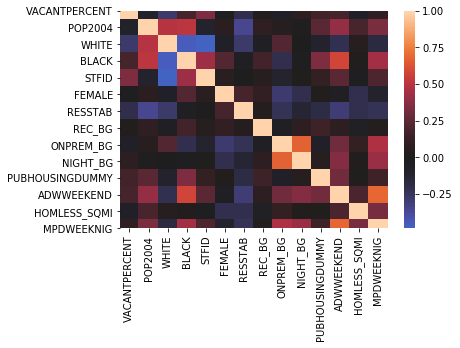

In [166]:
sns.heatmap(newnew_df.corr(), center=0);

In [167]:
# Our final features!
final_features = list(newnew_df.columns)
final_features

['VACANTPERCENT',
 'POP2004',
 'WHITE',
 'BLACK',
 'STFID',
 'FEMALE',
 'RESSTAB',
 'REC_BG',
 'ONPREM_BG',
 'NIGHT_BG',
 'PUBHOUSINGDUMMY',
 'ADWWEEKEND',
 'HOMLESS_SQMI',
 'MPDWEEKNIG']

In [168]:
mod = sm.OLS(y, newnew_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  AVGDV   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.95e-149
Time:                        13:44:11   Log-Likelihood:                -1658.6
No. Observations:                 431   AIC:                             3345.
Df Residuals:                     417   BIC:                             3402.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
VACANTPERCENT      18.2813      5.914     

## Other Selection

In [558]:
feature_set1 = ['PUBHOUSPT']

In [568]:
for_X = X.drop(feature_set1, axis = 1)
mod = sm.OLS(y, for_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  AVGDV   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     39.67
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.22e-129
Time:                        16:36:40   Log-Likelihood:                -1592.7
No. Observations:                 431   AIC:                             3313.
Df Residuals:                     367   BIC:                             3574.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
VACANTPERCENT        8.8722     10.705  